                                        Fabio Teixeira Ramos
                                            2020367

                            A Report Submitted in Partial Fulfilment 
                                    of the requirements for the 
                                            Degree of 
                                BSc in Computing in IT (4th year)



 

                                             May 2024



                                      Supervisor: David McQuaid



In [125]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [126]:
df = pd.read_csv("FireWall\log2 (1).csv")

i stated the data Analyze using .info  check the number of entries, data types, and for missing values

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


df.head() to see an overview of the structure.

In [128]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [130]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

because the .isnull show all outcome zero that means the data has no miss valus. what is good for us.

In [131]:
pd.options.display.float_format = "{:,.2f}".format

i did the options.display in order to have 2 decmal format 

In [132]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,"65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00"
mean,"49,391.97","10,577.39","19,282.97","2,671.05","97,123.95","22,385.80","74,738.15",102.87,65.83,41.40,61.47
std,"15,255.71","18,466.03","21,970.69","9,739.16","5,618,438.91","3,828,138.65","2,463,207.71","5,133.00",302.46,"3,218.87","2,223.33"
min,0.00,0.00,0.00,0.00,60.00,60.00,0.00,1.00,0.00,1.00,0.00
25%,"49,183.00",80.00,0.00,0.00,66.00,66.00,0.00,1.00,0.00,1.00,0.00
50%,"53,776.50",445.00,"8,820.50",53.00,168.00,90.00,79.00,2.00,15.00,1.00,1.00
75%,"58,638.00","15,000.00","38,366.25",443.00,752.25,210.00,449.00,6.00,30.00,3.00,2.00
max,"65,534.00","65,535.00","65,535.00","65,535.00","1,269,359,015.00","948,477,220.00","320,881,795.00","1,036,116.00","10,824.00","747,520.00","327,208.00"


In [133]:
df.shape

(65532, 12)

In [134]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

After completing the data analysis, I believe the data is now ready to initiate the machine learning modeling process, 
as I did not identify any missing values or gaps.

In the book Thoughtful MachineLearning with Python,they use a Decision Trees to Classifying Mushrooms 
and that is what i will do here in order to classifying the 4 categories – “allow, deny, drop, reset-both” 
in the incoming traffic to the firewall.
Decision tree classification is a supervised learning algorithm mostly used in
classification problems. Unlike the other model, decision trees can easily handle a mix
of numeric and categorical attributes and can even classify data for which attributes are
missing

In [135]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


The sklearn import tree has many commnad in order to make a Decision Trees.
in order to use a decision tree, all the data must be numerical and our "Action" column contains string values,
so we need to address this by converting it to numerical data.

In [136]:
d = {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}
df['Action'] = df['Action'].map(d)

In [137]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
count,"65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00","65,532.00"
mean,"49,391.97","10,577.39","19,282.97","2,671.05","97,123.95","22,385.80","74,738.15",102.87,65.83,41.40,61.47,0.62
std,"15,255.71","18,466.03","21,970.69","9,739.16","5,618,438.91","3,828,138.65","2,463,207.71","5,133.00",302.46,"3,218.87","2,223.33",0.79
min,0.00,0.00,0.00,0.00,60.00,60.00,0.00,1.00,0.00,1.00,0.00,0.00
25%,"49,183.00",80.00,0.00,0.00,66.00,66.00,0.00,1.00,0.00,1.00,0.00,0.00
50%,"53,776.50",445.00,"8,820.50",53.00,168.00,90.00,79.00,2.00,15.00,1.00,1.00,0.00
75%,"58,638.00","15,000.00","38,366.25",443.00,752.25,210.00,449.00,6.00,30.00,3.00,2.00,1.00
max,"65,534.00","65,535.00","65,535.00","65,535.00","1,269,359,015.00","948,477,220.00","320,881,795.00","1,036,116.00","10,824.00","747,520.00","327,208.00",3.00


Then we have to separate the feature columns from the Action column.
The feature columns are the columns that we try to predict from,
and the target column is the column with the values we try to classifer.

In [138]:
features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received'
           , 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

X = df[features]
y = df['Action']


where we split the data in two parts, the variebles that will help us to classifier (in case x)
and the one we will predicti ( in case Y) 

In [139]:
print(X)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

         Bytes  Bytes Sent  Bytes Received  Packets

In [140]:
print(y) 

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Name: Action, Length: 65532, dtype: int64


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Up we are traning the Decision Tree, 
test_size=0.2: This parameter determines the size of the test set relative to the entire dataset. 
In this case, it's set to 0.2, which means the test set will contain 20% of the data,
while the training set will contain the remaining 80%.
and the random_state=42: the random seed used by the random number generator.
It ensures that the data is split in a reproducible manner.

In [142]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

Here is Where we create a decision tree, important concept from decision tree is known as Gini, also known as information gain.
when we take this data and we run a decision tree algorithm on top of this data the very first thing that will happen here is
decision tree algorithm has to decide how to create the tree. when creating a tree it needs to decide what should be the root node when
I say what should be the root node the candidate for root nodes are all the independent variables in my data base ( this case = 
X = df[features]).
let's say i take Bytes and Packets, now i hava two candidates of my root node for the decision tree that where gini take place,
gini will compute the probability using the output of them and wherever it finds the minimum Gini index that particular
split the particular column will be selected as the tree splitting criteria.


In [143]:
predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("show the total of accuracy {:.2f}%".format(accuracy * 100))

show the total of accuracy 99.84%


In [144]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='weighted')


In [152]:
print("F1-score tree decission:{:.2f}%".format(f1 * 100))

F1-score tree decission:99.84%


In [ ]:
Achieving 99% accuracy and an F1-score of 99 is quite impressive. 
It indicates that the model is performing exceptionally well in classification tasks
look a good perfor of decission tree.

In [148]:
predictions = dtree.predict(X)
print("Previsões:")
print(predictions [:10] )

Previsões:
[0 0 0 0 0 0 0 0 0 0]


Result in  nunbers.

In [149]:
reverse_d = {v: k for k, v in d.items()}
predictions_names = [reverse_d[prediction] for prediction in predictions]

i am create a new dictionary where the keys are the original values
and the values are the original keys of the dictionary "d".

In [150]:
print("Previsões:")
print(predictions_names [:10])

Previsões:
['allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow', 'allow']


In [65]:
print(dtree.predict([[4000, 450, 3423, 677,70,71230,2210,2022,0,330,220]])) 

[2]


In [ ]:
new_predict = dtree.predict([[4000, 450, 3423, 677, 70, 71230, 2210, 2022, 0, 330, 220]])
name= reverse_d[new_predict[0]]

In [73]:
print("Label name:", name)

Up are the values corresponding to those features: 
Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets,
Elapsed Time (sec), pkts_sent, pkts_received.
If you want to predict the traffic on a firewall.

As my secund classifier i chosse the support vector machines (SVMs). This algorithm uses
decision boundaries to split data into multiple parts and operates well in higher
dimensions due to feature transformation and ignoring distances between data
points.Its primary objective is to find the optimal hyperplane that best separates data points 
belonging to different classes.




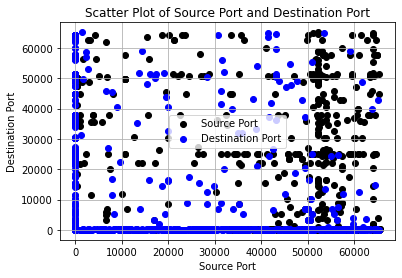

In [91]:
import matplotlib.pyplot as plt
df_subset = df.head(1000)


plt.scatter(df_subset['Source Port'], df_subset['Destination Port'], c='k', label='Source Port')  
plt.scatter(df_subset['NAT Source Port'], df_subset['Destination Port'], c='b', label='Destination Port') 
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.title('Scatter Plot of Source Port and Destination Port')
plt.legend()
plt.grid(True)
plt.show()

I did a plot up in order to us visualize how bad the data is linearly separable, 
meaning we cant draw a straight line (or plane, or hyperplane in higher dimensions) to separate the classes.
Becuse of that now we gonna use The Radial Basis Function (RBF) Kernel is one of the most commonly used kernel functions
in Support Vector Machines (SVM).
It's particularly effective for handling non-linearly separable data.
 
